In [2]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
from sklearn.cluster import DBSCAN
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans

In [3]:
df = pd.read_parquet(r"E:\Hydroneo\Analytics\disease\data\disease_clusters.parquet", engine="pyarrow")

print(df.head())

                         id   latitude   longitude  cluster_10km  \
0  66fd107a636caa2b6a7218b8  16.335354  102.254739            -1   
1  6707853b97fb7a0c60569ad7  13.706300  100.459700             0   
2  670e17dd97fb7a0c60b3820b  13.706300  100.459700             0   
3  670e182e97fb7a0c60b38670  13.753165  100.494722             0   
4  670e191297fb7a0c60b392a1  13.706300  100.459700             0   

   cluster_30km  cluster_50km  
0            -1            -1  
1             0             0  
2             0             0  
3             0             0  
4             0             0  


In [4]:
def plot_clusters(df: pd.DataFrame, cluster_col: str):
    """Scatter plot of latitude/longitude for one cluster column."""
    plt.figure(figsize=(8,6))
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_points = df[df[cluster_col] == cluster_id]
        label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise (-1)"
        plt.scatter(
            cluster_points["longitude"], 
            cluster_points["latitude"], 
            label=label,
            s=50, alpha=0.7
        )
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Geospatial Clusters ({cluster_col})")
    plt.legend()
    plt.show()

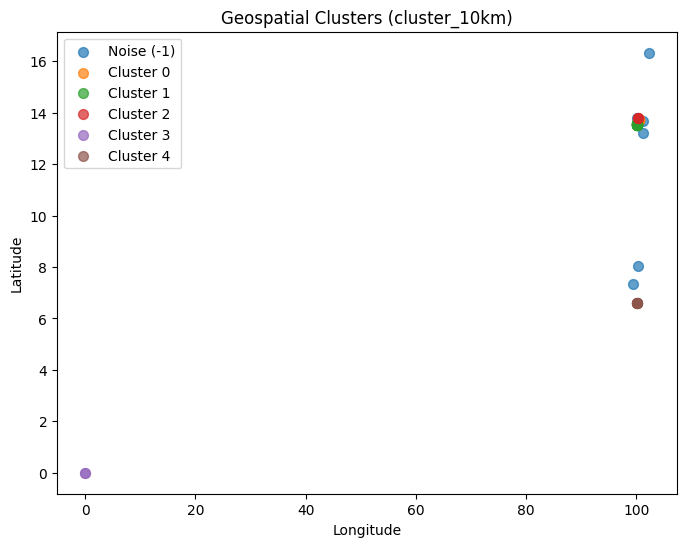

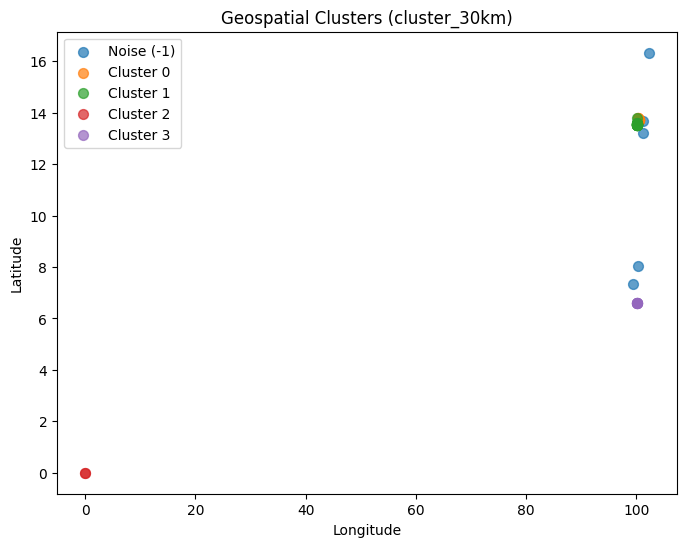

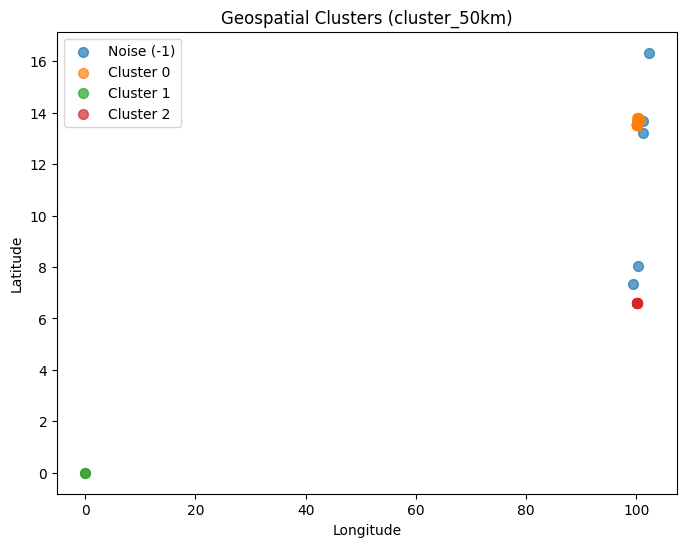

In [5]:
for col in ["cluster_10km", "cluster_30km", "cluster_50km"]:
    plot_clusters(df, col)